In [1]:
# 数据处理工具
import pandas as pd
import numpy as np
import random as rnd
from collections import Counter
import utils

# 可视化工具
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
user_feature_embedding_app = pd.read_csv('data/user_feature_embedding_app_merged.csv')
user_feature_embedding_app.head()

,uid,appId
0,26325489,NaN
1,1184123,NaN
2,76072711,NaN
3,63071413,NaN
4,81294159,NaN


progress: 100


(array([  367264.,   243911.,   167917.,   158833.,   283571.,   361346.,
          297983.,   458963.,   298131.,   414535.,   279824.,   310418.,
          319795.,   365042.,   451380.,   374539.,   347167.,   465820.,
          196579.,   260401.,   303759.,   435499.,   195737.,   338443.,
          153551.,   273667.,   117131.,   506613.,   437627.,   591719.,
          252586.,   290149.,   418152.,   308463.,   164002.,   322617.,
          346092.,   303214.,   295979.,   445444.,   266501.,   241259.,
          441914.,   419029.,   209048.,   269854.,   367590.,   264109.,
          251919.,   491467.,   226863.,   247589.,   393819.,   299811.,
          332422.,   303297.,   293921.,   465778.,   390461.,   409256.,
          281276.,   366764.,   429972.,   522770.,   232157.,   319552.,
          358368.,   149365.,   225097.,   450884.,   311357.,   275523.,
          411830.,   287970.,   446470.,   302266.,   263962.,   339114.,
          318188.,   239091.,   256425

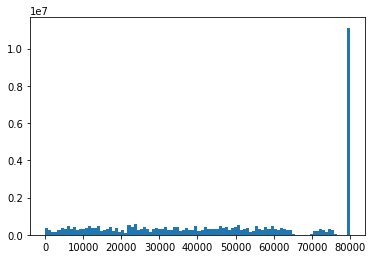

In [5]:
collector_app = utils.count_element(user_feature_embedding_app['appId'], fill_na='80000')
plt.hist(collector_app, bins=100)

In [7]:
counter_app = Counter(collector_app)
counter_app.most_common(10)

[(80000, 11119608),
 (50700, 131191),
 (57849, 130493),
 (6071, 123565),
 (24830, 120417),
 (31814, 119912),
 (47169, 110297),
 (14237, 107569),
 (50416, 106564),
 (7654, 99793)]

In [8]:
dic_less_than_100, dic_more_than_100 = utils.count_baseline(counter_app, 100)
print(len(dic_less_than_100))
print(len(dic_more_than_100))

55700
15374


(array([  18.,   58.,  146.,  355.,  688., 1078., 1393., 1815., 2106.,
        2326., 2408., 2374., 2242., 2074., 2008., 1787., 1702., 1571.,
        1394., 1221., 1239., 1181., 1032., 1024.,  931.,  841.,  811.,
         794.,  729.,  713.,  653.,  677.,  581.,  540.,  572.,  473.,
         489.,  514.,  421.,  468.,  438.,  385.,  387.,  404.,  366.,
         360.,  353.,  338.,  290.,    0.,  316.,  288.,  298.,  282.,
         246.,  254.,  280.,  246.,  239.,  233.,  242.,  213.,  213.,
         229.,  188.,  189.,  183.,  211.,  201.,  210.,  208.,  179.,
         198.,  179.,  163.,  145.,  168.,  128.,  182.,  166.,  130.,
         150.,  133.,  151.,  133.,  126.,  121.,  134.,  135.,  115.,
         103.,   97.,  135.,  128.,  130.,  118.,  102.,  108.,  105.,
         101.]),
 array([ 1.  ,  1.98,  2.96,  3.94,  4.92,  5.9 ,  6.88,  7.86,  8.84,
         9.82, 10.8 , 11.78, 12.76, 13.74, 14.72, 15.7 , 16.68, 17.66,
        18.64, 19.62, 20.6 , 21.58, 22.56, 23.54, 24.52, 25.

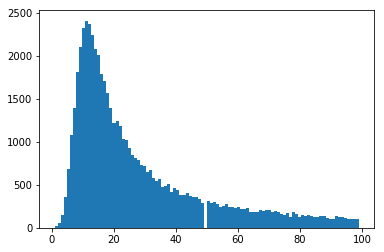

In [9]:
plt.hist(dic_less_than_100.values(), bins=100)

In [11]:
app_cleaned = utils.remove_rare_labels(user_feature_embedding_app['appId'], dic_less_than_100, '0')

progress: 100


In [13]:
app_cleaned_collector = utils.count_element(app_cleaned)

progress: 100


In [15]:
app_cleaned_count = Counter(app_cleaned_collector)
utils.asset_clean_result(app_cleaned_count, 100, dic_less_than_100, dic_more_than_100)

55700
15374
0
15374


In [17]:
print(max(app_cleaned_collector))
print(min(app_cleaned_collector))

76215
0


In [19]:
word2int = utils.create_lookup_tables(app_cleaned_collector)

In [20]:
print(max(word2int.values()))
print(min(word2int.values()))
print(max(word2int.keys()))
print(min(word2int.keys()))

15373
0
76215
0


In [22]:
print(len(set(app_cleaned_collector)))
print(len(word2int.keys()))

15374
15374


In [23]:
import sys
app_mapped = app_cleaned.copy()
length = len(app_mapped)
step = length // 10
for i, e in enumerate(app_mapped.fillna('0')):
    if e.isdigit():
        app_mapped[i] = str(word2int[int(e)])
    else:
        elements = list()
        for ee in e.split('-'):
            elements.append(str(word2int[int(ee)]))
        formed = '-'
        formed = formed.join(elements)
        app_mapped[i] = formed
    if i % step == 0:
        sys.stdout.write('progress: ' + str(10 * i // step) + '\r')
        sys.stdout.flush()
sys.stdout.write('progress: 100\n')
sys.stdout.flush()

app_mapped.head()

progress: 100


0    0
1    0
2    0
3    0
4    0
Name: appId, dtype: object

In [31]:
user_feature_embedding_app['appId'][11419942]

'74681-70908-74041-71171-72602'

progress: 100


(array([1.9593718e+07, 3.7133330e+06, 2.3099510e+06, 1.5752340e+06,
        1.1210500e+06, 8.4443800e+05, 6.8438100e+05, 5.8415300e+05,
        5.1883200e+05, 4.5198700e+05, 3.9309000e+05, 3.4834000e+05,
        3.1520100e+05, 2.8062300e+05, 2.5372400e+05, 2.3192400e+05,
        2.1161900e+05, 1.9400000e+05, 1.7862600e+05, 1.6769800e+05,
        1.5682400e+05, 1.4672000e+05, 1.3612300e+05, 1.2897700e+05,
        1.2143100e+05, 1.1444600e+05, 1.0867900e+05, 1.0367600e+05,
        9.8178000e+04, 9.2667000e+04, 8.8568000e+04, 8.3961000e+04,
        7.9555000e+04, 7.5977000e+04, 7.3234000e+04, 7.0326000e+04,
        6.7519000e+04, 6.4484000e+04, 6.2740000e+04, 6.0575000e+04,
        5.7742000e+04, 5.6055000e+04, 5.4208000e+04, 5.2506000e+04,
        5.0358000e+04, 4.9138000e+04, 4.7653000e+04, 4.6191000e+04,
        4.4411000e+04, 4.3379000e+04, 4.2105000e+04, 4.0587000e+04,
        3.9827000e+04, 3.8745000e+04, 3.7510000e+04, 3.6190000e+04,
        3.5528000e+04, 3.4635000e+04, 3.3806000e

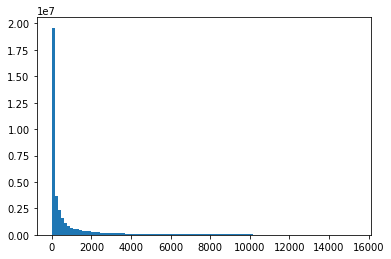

In [33]:
app_mapped_collector = utils.count_element(app_mapped, '80000')
plt.hist(app_mapped_collector, bins=100)

In [35]:
print(max(app_mapped_collector))
print(min(app_mapped_collector))

15373
0


In [36]:
user_feature_embedding_app['appId'] = app_mapped
user_feature_embedding_app.to_csv('data/user_feature_embedding_app_merged_mapped_cleaned.csv', columns=['appId'], index=False)

In [1]:
# 数据处理工具
import pandas as pd
import numpy as np
import random as rnd
from collections import Counter
import utils

# 可视化工具
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
interest = pd.read_csv('data/user_feature_embedding_int_merged.csv')

In [5]:
int_collector = utils.count_element(interest['interest'].fillna('10000'))
int_counter = Counter(int_collector)

progress: 100


In [14]:
int_counter.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 278, 279, 280, 281, 282, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 401, 402, 403, 404, 405, 406, 407, 40

In [17]:
interest.fillna('0', inplace=True)

In [19]:
int_collector_fill0 = utils.count_element(interest['interest'])
int_counter_fill0 = Counter(int_collector_fill0)

progress: 100


In [20]:
int_counter_fill0.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 278, 279, 280, 281, 282, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 401, 402, 403, 404, 405, 406, 407,

In [22]:
interest.to_csv('data/user_feature_embedding_int_merged.csv', columns=['interest'], index=False)

In [9]:
topic = pd.read_csv('data/user_feature_embedding_to_merged.csv')

In [11]:
to_collector = utils.count_element(topic['topic'].fillna('40000'))
to_counter = Counter(to_collector)

progress: 100


In [29]:
to_sorted = sorted(set(to_collector))

In [33]:
print(to_sorted[:5])
print(to_sorted[-5:])

[0, 1, 2, 3, 4]
[29459, 29460, 29461, 29463, 40000]


In [35]:
topic.fillna('30000', inplace=True)

In [36]:
topic.to_csv('data/user_feature_embedding_to_merged.csv', columns=['topic'], index=False)

In [4]:
interest = pd.read_csv('data/user_feature_embedding_int_merged.csv')
kw = pd.read_csv('data/user_feature_embedding_kw_merged_mapped_cleaned.csv')
topic = pd.read_csv('data/user_feature_embedding_to_merged.csv')
appId = pd.read_csv('data/user_feature_embedding_app_merged_mapped_cleaned.csv')

In [11]:
embedding_ori = pd.read_csv('data/user_feature_all.csv')

In [14]:
column_embedding = ['uid', 'interest1', 'interest2', 'interest3', 'interest4', 'interest5',
                    'kw1', 'kw2', 'kw3',
                    'topic1', 'topic2', 'topic3',
                    'appIdInstall', 'appIdAction']

In [20]:
intkw = pd.merge(interest, kw, left_index=True, right_index=True)
intkwto = pd.merge(intkw, topic, left_index=True, right_index=True)
embedding_final = pd.merge(intkwto, appId, left_index=True, right_index=True)
embedding_final.head()

,interest,kw,topic,appId
0,93-70-77-86-109-47-75-69-45-8-29-49-83-6-46-36...,2643-7395-1625-11-1-5-3251-4343-2845,9826-105-8525-5488-7281-19708-15553-16745-1747...,0
1,75-29-233,12-247-77-7736-50-897-1754-877-125,4391-9140-5669-1348-4388-19401-17724-11380-188...,0
2,70-12-28-106-59-49-41-6-42-115-35-116-36-11-96...,6951-471-2035-14-69-45-43-60,1502-5488-9826-2187-8088-15005-19154-12756-156...,0
3,93-70-77-47-76-75-69-29-59-49-122-42-46-23-17-...,113-184-372-492-1478-555-531-3458-3962-600,1619-7342-3064-9213-8525-10810-12438-15659-118...,0
4,75-29-49-122-36-11-631-616-513-508-506-632-542...,11-13232-544-1734-154-3234-339-400-43,477-9826-5808-644-2747-15483-12199-15424-11511...,0


In [23]:
embedding_final.to_csv('data/user_feature_embedding_final.csv', columns=['interest', 'kw', 'topic', 'appId'], index=False)

In [2]:
column_base = ['uid', 'age', 'gender', 'marriageStatus', 'education', 'consumptionAbility',
               'LBS', 'ct', 'os', 'carrier', 'house']
column_embedding = ['uid', 'interest1', 'interest2', 'interest3', 'interest4', 'interest5',
                    'kw1', 'kw2', 'kw3',
                    'topic1', 'topic2', 'topic3',
                    'appIdInstall', 'appIdAction']
column_embedding_merged = ['interest', 'kw', 'topic', 'appId']

In [3]:
embedding_final = pd.read_csv('data/user_feature_embedding_final.csv')
base = pd.read_csv('data/user_feature_base_normalized.csv')
user_feature_final = pd.merge(base, embedding_final, left_index=True, right_index=True)
user_feature_final.to_csv('data/user_feature_final.csv', columns=column_base+column_embedding_merged, index=False)

In [4]:
int_collector = utils.count_element(user_feature_final['interest'])
print(max(int_collector))
print(min(int_collector))

In [5]:
kw_collector = utils.count_element(user_feature_final['kw'])
print(max(kw_collector))
print(min(kw_collector))

progress: 100


16655
0


In [6]:
topic_collector = utils.count_element(user_feature_final['topic'])
print(max(topic_collector))
print(min(topic_collector))

progress: 100


30000
0


In [ ]:
appId_collector = utils.count_element(user_feature_final['appId'])
print(max(appId_collector))
print(min(appId_collector))